<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Model Evaluation and Refinement**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, and try to refine your model's performance in predicting the price of a laptop, given the attribute values.


# Objectives

After completing this lab you will be able to:

 - Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


In [ ]:
Après avoir terminé cet atelier, vous serez en mesure de :

Utilisez l’entraînement, les tests et la validation croisée pour améliorer les performances de l’ensemble de données.
Identifier le point de surajustement d’un modèle
Utiliser la régression de crête pour identifier la modification des performances d’un modèle en fonction de ses hyperparamètres
Utilisez la recherche de grille pour identifier le modèle le plus performant à l’aide de différents hyperparamètres

# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [ ]:
skillsnetwork pour télécharger le jeu de données
pandas pour gérer les données.
numpy pour les opérations mathématiques.
SKLEARN pour les fonctions liées à l’apprentissage automatique et au pipeline d’apprentissage automatique.
Seaborn pour visualiser les données.
matplotlib pour des outils de traçage supplémentaires.

### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


# Installation des bibliothèques requises
Les bibliothèques requises suivantes sont préinstallées dans l’environnement Skills Network Labs. Toutefois, si vous exécutez ces commandes de bloc-notes dans un autre environnement Jupyter (par exemple, Watson Studio ou Ananconda), vous devrez installer ces bibliothèques en supprimant le signe # avant %pip dans la cellule de code ci-dessous.

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


Les bibliothèques requises suivantes ne sont pas préinstallées dans l’environnement Skills Network Labs. Vous devrez exécuter la cellule suivante pour les installer :

In [1]:
import piplite
await piplite.install('seaborn')
await piplite.install(['ipywidgets'])

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


# Importation des bibliothèques requises
Nous vous recommandons d’importer toutes les bibliothèques requises en un seul endroit (ici) :

In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Importing the Dataset

Run the cell below to donwload the dataset into the console.


In [ ]:
Importation du jeu de données
Exécutez la cellule ci-dessous pour télécharger le jeu de données dans la console.

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [5]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [6]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


Remarque : Cette version du laboratoire fonctionne sur JupyterLite, ce qui nécessite le téléchargement du jeu de données sur l’interface. En travaillant sur la version téléchargée de ce notebook sur leurs machines locales (Jupyter Anaconda), les apprenants peuvent simplement sauter les étapes ci-dessus et utiliser simplement l’URL directement dans la fonction pandas.read_csv(). Vous pouvez annuler les commentaires et exécuter les instructions dans la cellule ci-dessous.

Import the data set into a data frame.


In [ ]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
#df = pd.read_csv(filepath, header=None)

Print the value of df.head(). 


In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [8]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


# Tâche 1 : Utiliser la validation croisée pour améliorer le modèle
Divisez le jeu de données en paramètres x_data et y_data. Ici, y_data se trouve l’attribut « Price », et x_data a tous les autres attributs de l’ensemble de données.

In [11]:
# Write your code below and press Shift+Enter to execute 
y_data=df["Price"]
x_data=df.drop("Price", axis=1)

<details><summary>Click here for the solution</summary>

```python
y_data = df['Price']
x_data = df.drop('Price',axis=1)
```

</details>


Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


Divisez l’ensemble de données en sous-ensembles d’entraînement et de test de sorte que vous réserviez 10 % de l’ensemble de données à des fins de test.

In [13]:
# Write your code below and press Shift+Enter to execute 
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.1, random_state=1 )
print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 24
number of training samples: 214


<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
```

</details>


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


Créez un modèle de régression linéaire à variable unique à l’aide du paramètre « CPU_frequency ». Affiche la valeur R^2 de ce modèle pour les sous-ensembles d’entraînement et de test.

In [17]:
# Write your code below and press Shift+Enter to execute 
lre= LinearRegression()
lre.fit(x_train[["CPU_frequency"]], y_train)
print(lre.score(x_train[["CPU_frequency"]], y_train))
print(lre.score(x_test[["CPU_frequency"]], y_test))

0.14829792099817962
-0.06599437350393766


1. La valeur négative R^2 que vous observez pour vos données de test indique que le modèle de régression linéaire est moins performant qu’une simple ligne horizontale représentant la moyenne des valeurs cibles. Voici comment interpréter les résultats :

# R^2 Interprétation :

Valeur R^2 : La valeur R^2 (coefficient de détermination) indique la proportion de la variance dans la variable dépendante qui est prévisible à partir de la ou des variables indépendantes.

- Un R^2 de 1 signifie que le modèle correspond parfaitement aux données.

- Un R^2 de 0 signifie que le modèle ne fait pas mieux que la moyenne de la variable dépendante.

- Un R^2 négatif signifie que le modèle fonctionne moins bien que l’utilisation de la moyenne comme prédicteur.


# Résultats :

Entraînement R2 = 0,1483 : Cela signifie que le modèle peut expliquer environ 14,83 % de la variance des données d’entraînement. Bien qu’il ne s’agisse pas d’une valeur très élevée, cela suggère que le modèle capture certaines des relations dans les données d’entraînement.

Test R^2 = -0,066 : cette valeur négative indique que le modèle fonctionne moins bien sur les données de test que si vous aviez simplement prédit la valeur moyenne des valeurs cibles de test pour toutes les instances. Cela suggère que le modèle ne généralise pas bien aux données invisibles.

Hello  @ MAHI NDOUNG rodrigue,

Thanks for your post. We are happy to assist you.

1.  The negative R^2 value you are observing for your test data indicates that the linear regression model is performing worse than a simple horizontal line representing the mean of the target values. Here’s how to interpret the results:

# R^2 Interpretation:

R^2 Value: The R^2 (coefficient of determination) value indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

- An R^2 of 1 means the model perfectly fits the data.

- An R^2 of 0 means the model does no better than the mean of the dependent variable.

- A negative R^2 means the model performs worse than using the mean as the predictor.

# Results:

Training R2 = 0.1483: This means that the model can explain approximately 14.83% of the variance in the training data. While not a very high value, it suggests that the model captures some of the relationships in the training data.

Test R^2 = -0.066: This negative value indicates that the model performs worse on the test data than if you had just predicted the mean value of the test target values for all instances. This suggests that the model is not generalizing well to unseen data.

<details><summary>Click here for the solution</summary>

```python
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))
```

</details>


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [ ]:
Exécutez une validation croisée 4 fois sur le modèle et imprimez la valeur moyenne du score R^2 ainsi que son écart-type.

In [ ]:
"The mean of the folds are" :« La moyenne des plis sont »

In [18]:
# Write your code below and press Shift+Enter to execute 
Rcross = cross_val_score(lre, x_data[["CPU_frequency"]], y_data, cv=2)
print("The mean of the folds are", Rcross.mean(), "and standard deviation is", Rcross.std())


The mean of the folds are -0.11427029299001601 and standard deviation is 0.0694864712416502


2. Voici comment interpréter la sortie :

Résultats de la validation croisée :

1. Moyenne des plis : -0,1611

2. Écart-type : 0,3850

Interprétation:

1. ### Moyenne des plis (-0,1611) :

Le score moyen R^2 sur les 4 plis est de -0,1611. Cette moyenne négative R^2 indique qu’en moyenne, votre modèle est moins performant qu’une simple ligne horizontale (la moyenne de la variable cible) pour les plis de validation croisée.

Un R^2 négatif suggère que le modèle ne capture pas efficacement la relation entre CPU_frequency et la variable cible et qu’il surajuste potentiellement les données d’entraînement ou ne capture pas du tout le modèle sous-jacent.

2. ### Écart-type (0,3850) :

L’écart-type des scores R^2 à travers les plis est de 0,3850. Cet écart-type relativement élevé indique une variabilité des performances du modèle entre différents sous-ensembles de données.

Un écart-type élevé suggère que les performances du modèle ne sont pas cohérentes et peuvent varier considérablement en fonction du sous-ensemble particulier de données sur lequel il est entraîné. Cette variabilité peut être due à plusieurs facteurs, tels que la sensibilité du modèle aux données d’entraînement spécifiques ou le bruit inhérent aux données.

2.  Here's how to interpret the output:

Cross-Validation Results:

1.Mean of the Folds: -0.1611

2.Standard Deviation: 0.3850

Interpretation:

1. ### Mean of the Folds (-0.1611):

The mean R^2 score across the 4 folds is -0.1611. This negative mean R^2 indicates that, on average, your model performs worse than a simple horizontal line (the mean of the target variable) for the cross-validation folds.

A negative R^2 suggests that the model is not capturing the relationship between CPU_frequency and the target variable effectively and is potentially overfitting the training data or not capturing the underlying pattern at all.

2. ### Standard Deviation (0.3850):

The standard deviation of the R^2 scores across the folds is 0.3850. This relatively high standard deviation indicates variability in the model performance across different subsets of the data.

A high standard deviation suggests that the model’s performance is not consistent and can vary significantly depending on the particular subset of data it is trained on. This variability can be due to several factors, such as the model’s sensitivity to the specific training data or inherent noise in the data.

<details><summary>Click here for the solution</summary>

```python
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
```

</details>


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


Divisez à nouveau l’ensemble de données en composants d’entraînement et de test, en réservant cette fois 50 % de l’ensemble de données pour les tests.

In [20]:
# Write your code below and press Shift+Enter to execute 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

#  La fixation de random_state à une quantité fixe permet de maintenir l’uniformité entre plusieurs
#  exécutions du code.

<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)
# fixing random_state to a fixed quantity helps maintain uniformity between multiple 
# executions of the code.
```

</details>


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


Pour identifier le point de surajustement du modèle sur le paramètre « CPU_frequency », vous devez créer des entités polynomiales à l’aide de l’attribut unique. Vous devez évaluer les scores R^2 du modèle créé à l’aide de différents degrés de caractéristiques polynomiales, allant de 1 à 5. Enregistrez cet ensemble de valeurs du score R^2 sous forme de liste.

In [23]:
# Write your code below and press Shift+Enter to execute 
lre= LinearRegression()
Rsqu_test=[]
order= [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
    

<details><summary>Click here for the solution</summary>

```python
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
```

</details>


Plot the values of R^2 scores against the order. Note the point where the score drops.


In [ ]:
Tracez les valeurs des scores R^2 par rapport à l’ordre. Notez le point où le score baisse.

Text(0.5, 1.0, 'R^2 Using Test Data')

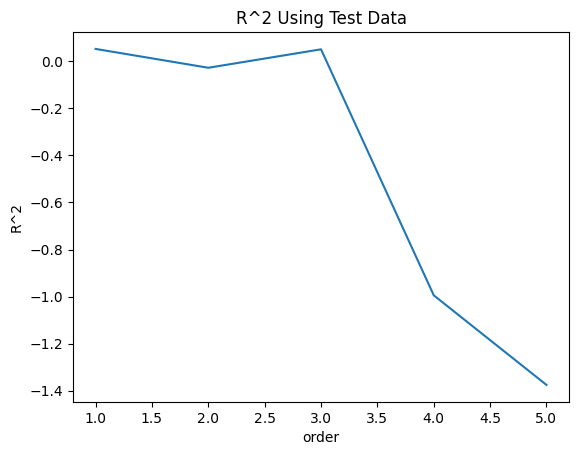

In [24]:
# Write your code below and press Shift+Enter to execute 
plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 Using Test Data")

<details><summary>Click here for the solution</summary>

```python
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
```

</details>


# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


Considérez maintenant que vous avez plusieurs fonctionnalités, c’est-à-dire 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core''OS', 'GPU' et 'Catégorie'. Créez un modèle de caractéristiques polynomiales qui utilise tous ces paramètres avec degree=2. Créez également les ensembles d’attributs d’entraînement et de test.

In [26]:
# Write your code below and press Shift+Enter to execute 
pr = PolynomialFeatures( degree = 2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU',  'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU',  'Category']])

<details><summary>Click here for the solution</summary>

```python
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
```

</details>


Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


Créez un modèle de régression de crête et évaluez-le à l’aide des valeurs de l’hyperparamètre alpha comprises entre 0,001 et 1 avec des incréments de 0,001. Créez une liste de tous les scores R^2 de la régression de crête pour les données d’entraînement et de test.

In [28]:
# Write your code below and press Shift+Enter to execute 
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar= tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score= RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

<ipython-input-28-a19ba6572580>:5: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  pbar= tqdm(Alpha)
100%|██████████| 999/999 [00:07<00:00, 129.15it/s, Test Score=0.423, Train Score=0.669]


<details><summary>Click here for the solution</summary>

```python
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
```

</details>


Plot the R^2 values for training and testing sets with respect to the value of alpha


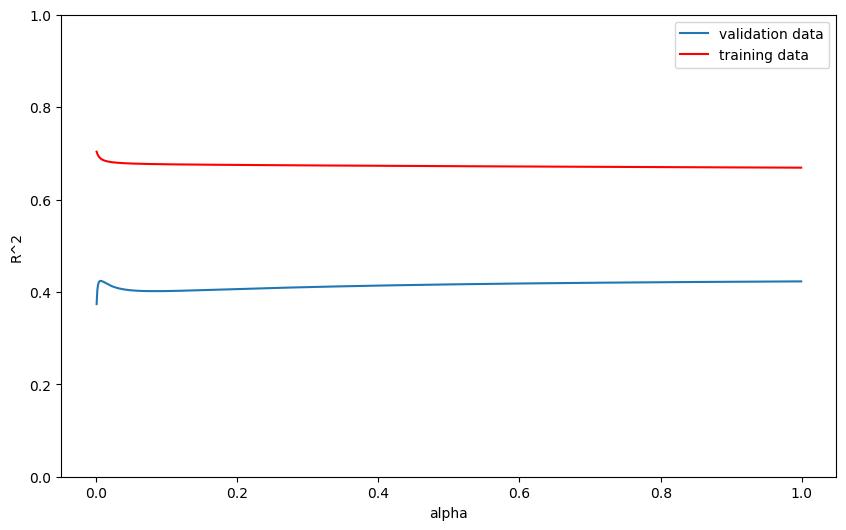

In [29]:
# Write your code below and press Shift+Enter to execute 
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label="validation data")
plt.plot(Alpha, Rsqu_train, 'r', label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0,1)
plt.legend()

<details><summary>Click here for the solution</summary>

```python
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
```

</details>


# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


En utilisant les données brutes et le même ensemble de caractéristiques que celui utilisé ci-dessus, utilisez GridSearchCV pour identifier la valeur d’alpha pour laquelle le modèle fonctionne le mieux. Supposons que l’ensemble des valeurs alpha soit utilisé comme

{0.0001, 0.001, 0.01, 0.1, 1, 10}

In [30]:
# Write your code below and press Shift+Enter to execute 
parameters1 = [{"alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

<details><summary>Click here for the solution</summary>

```python
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]
```

</details>


Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [ ]:
Créez une instance Ridge et exécutez Grid Search à l’aide d’une validation croisée 4 fois.

In [32]:
# Write your code below and press Shift+Enter to execute 
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1,  cv=4)

<details><summary>Click here for the solution</summary>

```python
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
```
</details>


Fit the Grid Search to the training data.


In [33]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU',  'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

3. L’application de GridSearchCV à un modèle Ridge (ou à n’importe quel modèle) est destinée à trouver le meilleur ensemble d’hyperparamètres qui améliorent les performances du modèle. Cependant, il n’est pas rare que le score R^2 des données de test diminue après le réglage des hyperparamètres. Voici quelques raisons pour lesquelles cela peut se produire et si c’est normal :

Raisons de la diminution du score R^2 :

1. Surajustement sur l’ensemble de validation croisée :
    
- GridSearchCV optimise les hyperparamètres en fonction des performances de validation croisée. Les hyperparamètres sélectionnés peuvent bien fonctionner sur les plis de validation croisée mais surajuster les données d’entraînement, ce qui entraîne de moins bonnes performances sur l’ensemble de test.

2. Variabilité des données :

- Si l’ensemble de test ne représente pas les ensembles d’entraînement/validation croisée, le modèle peut avoir de mauvais résultats sur l’ensemble de test malgré de bons résultats sur les plis de validation croisée.

3. Complexité des hyperparamètres :

- La régression de crête implique la régularisation, ce qui ajoute de la complexité au modèle. Si le paramètre de régularisation optimal (alpha) trouvé par GridSearchCV n’est pas approprié pour les données de test, cela peut entraîner de moins bonnes performances.

4. Caractère aléatoire dans les divisions de données :

- Les résultats de la validation croisée peuvent varier en fonction de la façon dont les données sont divisées en plis. Des fractionnements différents peuvent conduire à des sélections d’hyperparamètres différentes.

Bon apprentissage !   

3.  Applying GridSearchCV to a Ridge model (or any model) is intended to find the best set of hyperparameters that improve model performance. However, it is not uncommon for the R^2 score of the test data to decrease after hyperparameter tuning. Here are some reasons why this might happen and whether it is normal:

Reasons for Decrease in R^2 Score:

1. Overfitting on Cross-Validation Set:

- GridSearchCV optimizes hyperparameters based on cross-validation performance. The selected hyperparameters may perform well on the cross-validation folds but overfit the training data, leading to worse performance on the test set.

2. Data Variability:

- If the test set does not represent the training/cross-validation sets, the model might perform poorly on the test set despite performing well on the cross-validation folds.

3. Complexity of Hyperparameters:

- Ridge regression involves regularization, which adds complexity to the model. If the optimal regularization parameter (alpha) found by GridSearchCV is not appropriate for the test data, it can lead to poorer performance.

4. Randomness in Data Splits:

- Cross-validation results can vary depending on how the data is split into folds. Different splits might lead to different hyperparameter selections.

Happy Learning!

<details><summary>Click here for the solution</summary>

```python
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)
```
</details>


Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [34]:
# Write your code below and press Shift+Enter to execute 
BestRR = Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU',  'Category']], y_test))

0.3009905048691819


<details><summary>Click here for the solution</summary>

```python
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))
```
</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
